In [1]:
from occultence import *
import time

(0.98, 1.02)

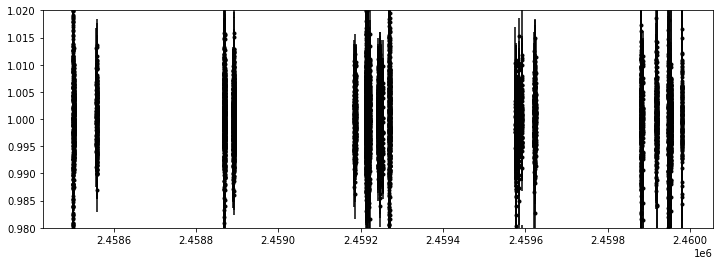

In [2]:
test_case = False

if test_case:

    t = np.linspace(0.5,0.9,200)
    ferr = 1e-3 * np.ones(len(t))
    f = 1 + (ferr * (np.random.randn(len(t))))
    f[22] = 1.01 # add a cosmic
    f[63] = 1.008 # add a cosmic
    f[50] = 0.0 # add a zero flux point
    # f[100:120] *= 0.995 # add a transit
    f *= np.linspace(1,1.01, len(t)) # add a linear trend for the GP to remove
    
else:
    file_path = "/Users/fl386/Desktop/SPECULOOS_project/zooniverse/data"
    files = glob.glob(file_path+"/*")

    i = 10
    file_name = files[i]
    gaia_id = file_name.split("/")[-1].replace(".csv","")

    data = pd.read_csv(file_name)

    mask = (~np.isnan(data["diff_flux_use"])) & (~np.isnan(data["diff_error"])) & (data["diff_error"]>0)
    data = data[mask]
    data.reset_index(drop = True, inplace = True)

    t = data["bjd"].values
    f = data["diff_flux_use"].values
    ferr = data["diff_error"].values

    
    #just here:
    #t = t.min() + np.median(t[1:]-t[:-1])*np.arange(len(t))
    
plt.figure(figsize=(12,4))
plt.errorbar(t,f,ferr,fmt='k.')
plt.ylim(0.98,1.02)

In [3]:
targ = LightCurve(name = "test",
                  time = t,
                  flux = f,
                  uncertainty = np.abs(ferr),
                  metadata={'R_star':0.1*u.R_sun, 'M_star':0.1*u.M_sun})

In [4]:
targ_with_transit = targ.inject_transit(per=5*u.d, epoch=0.7 * u.d, inc=90 * u.degree, rp=1 * u.R_earth, ld=[0.3,0.3])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='Time [d]', ylabel='Flux'>

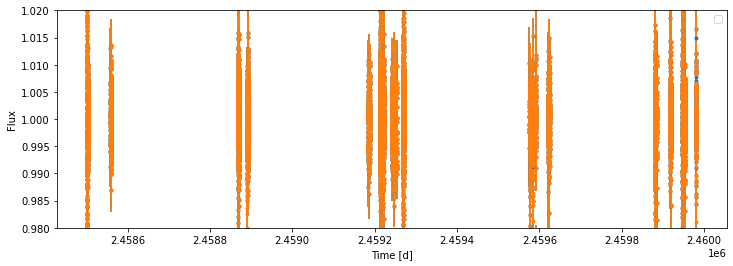

In [5]:
ax=targ.plot()
targ_with_transit.plot(ax=ax)

In [6]:
targ_with_transit.metadata

{'name': 'test_inject',
 'target': 'test',
 'R_star': <Quantity 0.1 solRad>,
 'M_star': <Quantity 0.1 solMass>,
 'injected_planet': {'period': [<Quantity 5. d>],
  'epoch': [<Quantity 0.7 d>],
  'inc': [<Quantity 90. deg>],
  'rp': [<Quantity 1. earthRad>],
  'a': [<Quantity 5.71151244 solRad>],
  'a_Rs': [<Quantity 57.11512439>],
  'ld': [[0.3, 0.3]],
  'depth': [<Quantity 0.00840502>],
  'duration': [<Quantity 0.03042218 d>]}}

In [7]:
planets = targ_with_transit.create_lots_of_transit_params(nfake=100, 
                                                          minimum_planet_radius=1 * u.R_earth, maximum_planet_radius=3 * u.R_earth,
                                                          minimum_period=0.5 * u.d, maximum_period=4 * u.d,)

In [8]:
planets

,logP,phase,cosi,r_p,depth,duration,epoch,a,a_Rs,recovered,...,rec_depth,rec_duration,rec_epoch,run,snr,target,r_s,m_s,teff,spt
0,0.299736,0.032422,0.002337,1.318107,0.014602928611420525,0.022947,2.458503e+06,3.0945353104837423 solRad,30.94535310483742,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
1,0.602021,0.219092,0.000081,1.368023,0.01572988490330755,0.029114,2.458503e+06,4.921736552768352 solRad,49.21736552768352,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
2,0.601783,0.344072,0.000011,2.566200,0.05535025778469344,0.031951,2.458504e+06,4.919942655658044 solRad,49.19942655658044,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
3,0.357238,0.390655,0.000269,1.755026,0.02588842055127661,0.024890,2.458503e+06,3.3801027635760863 solRad,33.80102763576086,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
4,0.135243,0.189314,0.003162,1.831201,0.02818451755226859,0.021077,2.458503e+06,2.4039934316074376 solRad,24.039934316074376,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.045057,0.023692,0.003584,1.426380,0.017100515285558563,0.019043,2.458503e+06,2.0931924806119744 solRad,20.931924806119742,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
96,0.241153,0.949135,0.002499,1.906845,0.030561145264757266,0.023002,2.458504e+06,2.828393027965003 solRad,28.28393027965003,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
97,0.512540,0.315965,0.000122,1.357956,0.015499231470084978,0.027160,2.458504e+06,4.290069085367317 solRad,42.90069085367316,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
98,0.459949,0.985499,0.000186,2.553542,0.05480554791395,0.028629,2.458505e+06,3.957341583695489 solRad,39.57341583695489,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None


In [9]:
time_start = time.time()
lcs, lcs_clean, lcs_gp, lcs_bls, planets_df = targ.full_injection_recovery(nfake=1, pool=False, minimum_planet_radius=1 * u.R_earth, maximum_planet_radius=4 * u.R_earth,
                                       minimum_period=0.5 * u.d, maximum_period=4 * u.d, recovery_kw = {'condition_on_epoch':1 * u.hour}, 
                                       verbose=False)
print(int(time.time()-time_start),"seconds")

14 seconds


In [10]:
planets_df

,logP,phase,cosi,r_p,depth,duration,epoch,a,a_Rs,recovered,...,rec_depth,rec_duration,rec_epoch,run,snr,target,r_s,m_s,teff,spt
0,0.222567,0.917398,0.001236,1.730222,0.025161830987586096,0.022395,2.458504e+06,2.748836202811285 solRad,27.488362028112846,1.0,...,0.024599,0.02,2.459219e+06,0.0,10.525889,test,0.1 solRad,0.1 solMass,None,None


In [11]:
#planets_df.loc[0]

In [12]:
lcs[0].metadata, lcs_bls[0].metadata

({'name': 'test_inject0',
  'target': 'test',
  'R_star': <Quantity 0.1 solRad>,
  'M_star': <Quantity 0.1 solMass>,
  'injected_planet': {'period': [<Quantity 2.44030583 d>],
   'epoch': [<Quantity 2458504.33876103 d>],
   'inc': [<Quantity 1.57059076 rad>],
   'rp': [<Quantity 3.5076038 earthRad>],
   'a': [<Quantity 3.54052199 solRad>],
   'a_Rs': [<Quantity 35.40521987>],
   'ld': [[0.385, 0.304]],
   'depth': [<Quantity 0.10340933>],
   'duration': [<Quantity 0.02900098 d>]},
  'thresholds': {}},
 {'name': 'test_inject0_clean_bin_bls',
  'target': 'test',
  'R_star': <Quantity 0.1 solRad>,
  'M_star': <Quantity 0.1 solMass>,
  'injected_planet': {'period': [<Quantity 2.44030583 d>],
   'epoch': [<Quantity 2458504.33876103 d>],
   'inc': [<Quantity 1.57059076 rad>],
   'rp': [<Quantity 3.5076038 earthRad>],
   'a': [<Quantity 3.54052199 solRad>],
   'a_Rs': [<Quantity 35.40521987>],
   'ld': [[0.385, 0.304]],
   'depth': [<Quantity 0.10340933>],
   'duration': [<Quantity 0.02900098

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


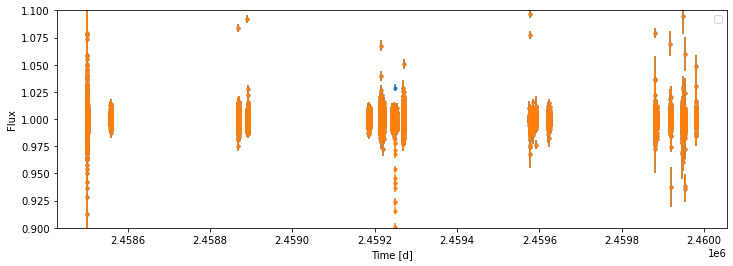

In [16]:
ax=targ.plot()
for i, lc in enumerate(lcs):
    #lc.plot(ax=ax, label=i, ylims=[0.9,1.1])
    lc.plot(ax=ax, ylims=[0.9,1.1])
    break

plt.legend()

For whatever reason the pooling doesn't seem to work in Jupyter on my computer...?

In [14]:
# pool = mp.Pool(5)
# lcs = pool.starmap(inject_transit, [(targ, (10**logp) * u.d, phase * 10**logp * u.d, math.acos(cosi) * u.radian,
#                                               rp * u.R_earth, [0.1,0.1]) for
#                                              logp, phase, cosi, rp in zip(planets['logP'], planets['phase'], planets['cosi'],
#                                                                           planets['r_p'])])

Text(0.5, 0, 'Planet Radius [R_earth]')

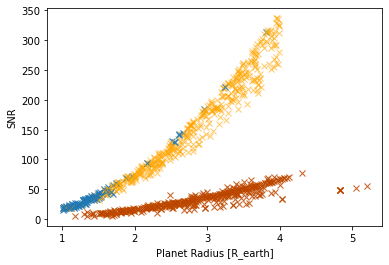

In [18]:
n_points_in_transit = planets_df['duration']/(7.5/(24*60))
lc_noise = 1e-3
rec_r_p = [x.to_value("R_earth") for x in (np.sqrt(planets_df['rec_depth']) * planets_df['r_s']).values]

for r_p, depth, rec, r_p_rec, snr, n in zip(planets_df['r_p'], planets_df['depth'],  planets_df['recovered'],rec_r_p,  planets_df['snr'], n_points_in_transit):
    if rec == 1.0:
        color = "orange"
    else:
        color = "C0"
        
    if r_p_rec == 0.0:
        r_p_rec = r_p
        snr = depth * np.sqrt(n)/lc_noise
    plt.plot([r_p,r_p_rec], [depth * np.sqrt(n)/lc_noise, snr], 'x', color=color, alpha=0.6)
    if rec == 1.0:
        plt.plot([r_p_rec], [snr], 'x', color='darkred', alpha=0.5)
plt.ylabel("SNR")
plt.xlabel("Planet Radius [R_earth]")
# plot_transitparams(results[4]['r_p'], results[4]['depth'] * np.sqrt(n_points_in_transit)/lc_noise, results[4]['recovered'], xlabel="Radius", ylabel="SNR", zlabel="Detected?", ylims=[], yscale='uniform',
#                        xscale='uniform', add_points={}, svname="")

Print recovery stats:

In [19]:
print(f"Planets recovered: {100 * len(planets_df.loc[planets_df['recovered'] == 1.0]) /  len(planets_df['recovered'])}%")
print(f"Observed Planets recovered: {100 * len(planets_df.loc[(planets_df['recovered'] == 1.0) & (planets_df['observed'] == 1.0)]) /  len(planets_df['recovered'][planets_df['observed']==1.0])}%")

Planets recovered: 79.6%
Observed Planets recovered: 100.0%


Plot only the planets which were observed:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


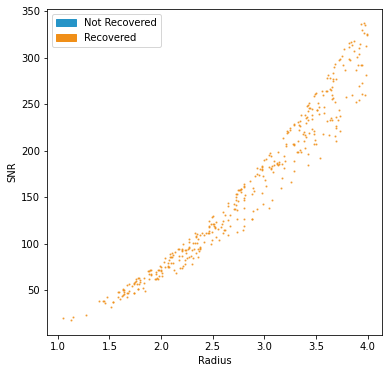

In [20]:
plot_transitparams(planets_df['r_p'][planets_df['observed'] == 1.0], planets_df['depth'][planets_df['observed'] == 1.0] * np.sqrt(n_points_in_transit[planets_df['observed'] == 1.0])/lc_noise, planets_df['recovered'][planets_df['observed'] == 1.0], xlabel="Radius", ylabel="SNR", zlabel="Detected?", ylims=[], yscale='uniform',
                       xscale='uniform', add_points={}, svname="")

Text(0, 0.5, 'Radius [R_Earth]')

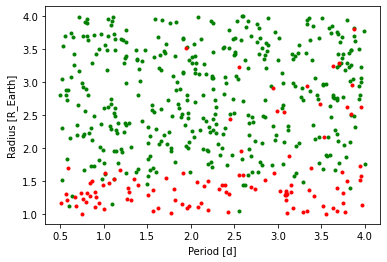

In [28]:
per = 10**planets_df['logP']
rad = planets_df['r_p']

plt.plot(per[planets_df['observed'] == 1.0],rad[planets_df['observed'] == 1.0],".",color="green")
plt.plot(per[planets_df['observed'] == 0.0],rad[planets_df['observed'] == 0.0],".",color="red")

plt.xlabel("Period [d]")
plt.ylabel("Radius [R_Earth]")